The task is to make a proper schedule for Skoltech.

The schedule must define for each subject: auditorium, time slots, days of the week. One course can not take place several times during one day, with the exception for "Basic Molecular Biology Techniques+Seminar", it takes the all Wednesday.

The constraints are given in 4 tables.

<ol>
 <li>'CoursesOverlapping': 
<p>For each pair of subjects we know whether they can overlap or not (the same day, the same time). </p></li>
 <li> 'CoursesWorkload': 
<p>Number of session per week and the session length is given.</p></li>
<li>'Courses vs Time-slots' :
<p>Preferable time slots for each course:
       <ul>
        <li>-1 - the time slot is totally inapplicable for the course because of the course type (see session lengths);</li>
        <li>0 - the time slot is very inconvenient;</li>
        <li>1 - the time slot is okay, but could be better;</li>
        <li>2 - the time slot can be used for the course session;</li>
        </ul>
</p>         
       
<li>'Courses vs Classrooms': 
<p>Preferable auditoriums for different courses: 
       <ul>
        <li>-1 - the auditorium is totally inapplicable for the course ;</li>
        <li>0 - the auditorium is very inconvenient; </li>
        <li>1 - the auditorium is okay, but could be better;</li>
        <li>2 - the auditorium can be used for the course session;</li>
       </ul>        
</p>
</li> 
</ol>
Also, take into account weekly events : 
Energy Colloquium and Skoltech Colloquium, Tue (4-5pm) and Thu (4-5pm) respectively, both are held in room 402.


In [28]:
import pandas as pd 
import numpy as np
xl = pd.ExcelFile("./MatrixForScheduling.xlsx", header = ['Basic Molecular Biology Techniques'])
df = pd.read_excel(xl, 'CoursesOverlapping')
courseNames = df.columns[1:]
overlapping = df.as_matrix()[:, 1:].astype(np.int)
for i in range(overlapping.shape[0]):
    overlapping[i,i] = 0
print overlapping.shape

(25, 25)


In [30]:
df

,0 = cannot overlap / 1 = can overlap,Basic Molecular Biology Techniques+Seminar,Bioinformatics Lab Course,Imaging in Biology,Functional Genomics,Mathematical Modeling in Biology,Ideas to Impact / Technology Commercialization,Energy Systems (Physics) & Technology,Methods for Enhanced Oil Recovery,Petrophysics and Reservoir Engineering,...,Convex Optimization for Data Science,Numerical Linear Algebra,Optimization Methods,Structural Analysis and Design,Pedagogy of Higher Education,History and Philosophy of Science,Spacecraft and Mission Design,Robotics,Energy Colloquium,Skoltech Colloquium
0,Basic Molecular Biology Techniques+Seminar,1,0,0,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,Bioinformatics Lab Course,0,1,0,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,Imaging in Biology,0,0,1,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,Functional Genomics,0,0,0,1,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,Mathematical Modeling in Biology,0,0,0,0,1,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,Ideas to Impact / Technology Commercialization,0,0,0,0,0,1,0,1,0,...,1,1,1,0,0,0,0,0,1,1
6,Energy Systems (Physics) & Technology,1,1,1,1,1,0,1,1,0,...,1,1,1,1,1,1,1,1,1,1
7,Methods for Enhanced Oil Recovery,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
8,Petrophysics and Reservoir Engineering,1,1,1,1,1,0,0,1,1,...,1,1,1,1,1,1,1,1,1,1
9,Computational Chemistry and Materials Modelling,1,1,1,1,1,0,1,1,1,...,1,1,1,0,1,1,1,1,1,1


In [31]:
np.all(overlapping == overlapping.T)

True

In [32]:
df = pd.read_excel(xl, 'CoursesWorkload')
workload = df.as_matrix()[:,:].astype(np.int)
workload.shape

(23, 2)

In [33]:
df

,sessions per week,session length
Basic Molecular Biology Techniques+Seminar,1,9
Bioinformatics Lab Course,2,2
Imaging in Biology,2,2
Functional Genomics,2,2
Mathematical Modeling in Biology,2,2
Convex Optimization for Data Science,2,2
Pedagogy of Higher Education,2,2
Ideas to Impact / Technology Commercialization,3,3
Energy Systems (Physics) & Technology,3,3
Methods for Enhanced Oil Recovery,3,3


In [34]:
df = pd.read_excel(xl, 'Courses vs Classrooms')
roomCourse = df.as_matrix()[:,1:-3].astype(np.int)
roomNames = df.as_matrix()[:,0]
print roomCourse.shape

(9, 23)


In [35]:
df

,"-1=impossible, 0=not suitable, 1=ok, but better to avoid, 2=suitable'",Basic Molecular Biology Techniques,Bioinformatics Lab Course,Imaging in Biology,Functional Genomics,Mathematical Modeling in Biology,Ideas to Impact / Technology Commercialization,Energy Systems (Physics) & Technology,Methods for Enhanced Oil Recovery,Petrophysics and Reservoir Engineering,...,Numerical Linear Algebra,Optimization Methods,Structural Analysis and Design,Pedagogy of Higher Education,History and Philosophy of Science,Spacecraft and Mission Design,Robotics,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,402,-1,2,2,2,2,1,2,2,2,...,0,0,2,2,2,-1,2,NaN,NaN,NaN
1,403,-1,2,2,2,2,1,2,2,2,...,0,0,2,2,2,-1,2,NaN,Energy Colloquium,402
2,404,-1,2,2,2,2,0,2,2,2,...,0,0,2,2,2,-1,2,NaN,Skoltech Colloquium,402
3,407,-1,2,2,2,2,2,2,2,2,...,2,2,2,2,2,-1,2,NaN,NaN,NaN
4,408,-1,2,2,2,2,2,2,2,2,...,2,2,2,2,2,-1,2,NaN,NaN,NaN
5,423,-1,0,0,0,0,0,1,2,2,...,0,0,1,0,0,-1,0,NaN,NaN,NaN
6,422,-1,0,0,0,0,0,0,2,2,...,0,0,0,0,0,-1,0,NaN,NaN,NaN
7,Space CREI Lab,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,2,-1,NaN,NaN,NaN
8,Venue: Institute of Gene Biology,2,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,NaN,NaN,NaN


In [36]:
df = pd.read_excel(xl, 'Courses vs Time-slots ')
couseTime = df.as_matrix()[:,1:-3].astype(np.int)
print  couseTime.shape

(7, 23)


In [37]:
df

,"-1=impossible, 0=not suitable, 1=ok, but better to avoid, 2=suitable'",Basic Molecular Biology Techniques+Seminar,Bioinformatics Lab Course,Imaging in Biology,Functional Genomics,Mathematical Modeling in Biology,Ideas to Impact / Technology Commercialization,Energy Systems (Physics) & Technology,Methods for Enhanced Oil Recovery,Petrophysics and Reservoir Engineering,...,Numerical Linear Algebra,Optimization Methods,Structural Analysis and Design,Pedagogy of Higher Education,History and Philosophy of Science,Spacecraft and Mission Design,Robotics,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,9.00 -12.00,2,-1,-1,-1,-1,1,2,0,0,...,1,1,2,2,2,2,2,NaN,NaN,NaN
1,12.30 - 15.30,2,-1,-1,-1,-1,1,2,1,1,...,2,2,2,2,2,2,2,NaN,Energy Colloquium,Tuesday 4-5 pm
2,16.00 - 19.00,2,-1,-1,-1,-1,2,2,2,2,...,1,1,2,2,2,2,1,NaN,Skoltech Colloquium,Thursday 4-5 pm
3,9.00 - 11.00,-1,2,2,2,2,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,NaN,NaN,NaN
4,11.30 - 13.30,-1,2,2,2,2,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,NaN,NaN,NaN
5,14.00 - 16.00,-1,2,2,2,2,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,NaN,NaN,NaN
6,16. 30 - 18.30,-1,2,2,2,2,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,NaN,NaN,NaN


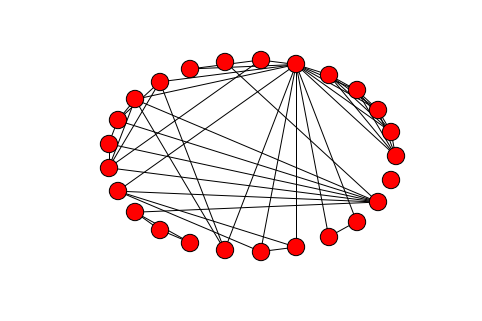

connected components 2
number of cliques [[5, 0, 1, 2, 3, 4], [5, 14, 19, 20], [5, 6, 8], [5, 9, 18], [5, 10, 18], [5, 21, 22], [11, 23, 10], [11, 23, 12], [12, 13, 23], [13, 10, 23], [15, 16, 17], [7, 23], [11, 9], [13, 9], [13, 6], [15, 23], [23, 14], [24]]


In [12]:
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline
G = nx.Graph()
G.add_nodes_from(range(overlapping.shape[0]))
for i in range(overlapping.shape[0]-1):
    for j in range(i+1,overlapping.shape[0]):
        if overlapping[i,j] == 0:
            G.add_edge(i,j)
nx.draw(G,pos=nx.shell_layout(G)) 
plt.show()
print 'connected components',nx.number_connected_components(G)
cliques = list(nx.find_cliques(G))
cliques = sorted(cliques,key = lambda x : -len(x))
print 'number of cliques',cliques

In [54]:

def is_colloq(c,r,d,t,l):
    return (((d==1)  and ((r==0) or (overlapping[-2,c] == 0))) or ((d == 3) and ((r == 0) or (overlapping[-1,c] == 0))))  and ((14 in range(t,t+l)) or (15 in range(t,t+l)))


from random import randint


def SA():
    courses = workload[:,0].copy()
    roomPref = []
    for c in  range(roomCourse.shape[1]):
        cp = []
        for r in range(roomCourse.shape[0]):
            if(roomCourse[r,c] == 2):#consider just best fitted rooms
                cp.append(r)
        roomPref.append(np.array(cp))

    availableTime = np.zeros((courses.shape[0],19))
    for i in range(couseTime.shape[1]):
        for j in range(3):
            if couseTime[j,i] >= 1:#consider just sutable time
                availableTime[i,j+j*6] = 1
        for j in range(4):
            if couseTime[j+3,i] >= 1:
                availableTime[i,j+j*4] = 1

    timeTable = -np.ones((5,roomCourse.shape[0],20),dtype=np.int)
    def get_course():
        c = np.random.choice(np.arange(courses.shape[0])[courses > 0])
        return c

    def get_day(c):
        return randint(0,4)

    def get_room(c,d):
        return np.random.choice(roomPref[c])

    def get_time(c,d,r):
        l = workload[c,1]
        t = np.random.choice(np.arange(availableTime.shape[1])[availableTime[c,:] > 0])
        return t,l

    def get_supplant(c,d,r,t,l):
        ar1 = np.unique(timeTable[d,:,t:t+l].flatten())
        ar1 = ar1[ar1 != -1]
        ar1 = ar1[overlapping[c,ar1]==0]
        ar2 = np.unique(timeTable[d,r,t:t+l])
        ar2 = ar2[ar2!=-1]
        ar3 = np.unique(timeTable[d,:,:][timeTable[d,:,:] == c].flatten())
        ar = np.concatenate((ar1,ar2,ar3))
        if(len(ar) == 0):
            return np.array([],dtype=np.int)
        supplant = np.unique(ar)
        return supplant

    def insert(c,d,r,t,l,supplant):
        if len(supplant) > 0:
            arr = timeTable[d,:,:]
            arr[arr == supplant[0]] = -1
            timeTable[d,:,:] = arr
        timeTable[d,r,t:t+l] = c
        courses[supplant] += 1
        courses[c] -= 1

    while(courses.sum() > 0):
        c = get_course()
        d = get_day(c)
        r = get_room(c,d)
        t,l = get_time(c,d,r)
        if is_colloq(c,r,d,t,l):
            continue
        supplant = get_supplant(c,d,r,t,l)
        if (np.random.rand()*(float(len(supplant))**3)) < 0.5:
            insert(c,d,r,t,l,supplant)

    #set colloq
    timeTable[1,0,14:16] = 23
    timeTable[3,0,14:16] = 24
    return timeTable

np.random.seed(1)

timeTable = SA()


In [55]:

def drawTimeTable(tt):
    times = [str(9+(i//2))+':'+str(3*(i%2))+'0--'+str(9+((i+1)//2))+':'+str(3*((i+1)%2))+'0' for i in range(20)]
    res = []
    for d in range(5):
        df = pd.DataFrame(index= range(20),columns = np.concatenate((np.array(['time']),roomNames)))
        df['time'] = times
        for r  in range(tt.shape[1]):
            for t in range(tt.shape[2]):
                if(tt[d,r,t] >= 0):
                    df[roomNames[r]][t] = courseNames[tt[d,r,t]]
        #writer = pd.ExcelWriter(str(d)+'.xlsx')
        #df.to_excel(writer)
        res.append(df)
    return res
        
dfs = drawTimeTable(timeTable)
dfs[0]

,time,402,403,404,407,408,423,422,Space CREI Lab,Venue: Institute of Gene Biology
0,9:00--9:30,NaN,NaN,NaN,NaN,Ideas to Impact / Technology Commercialization,NaN,NaN,NaN,NaN
1,9:30--10:00,NaN,NaN,NaN,NaN,Ideas to Impact / Technology Commercialization,NaN,NaN,NaN,NaN
2,10:00--10:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10:30--11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11:00--11:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,11:30--12:00,NaN,Imaging in Biology,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,12:00--12:30,NaN,Imaging in Biology,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,12:30--13:00,Pedagogy of Higher Education,Methods for Enhanced Oil Recovery,NaN,Numerical Linear Algebra,Material Structure Characterization Methods,Petrophysics and Reservoir Engineering,NaN,Spacecraft and Mission Design,NaN
8,13:00--13:30,Pedagogy of Higher Education,Methods for Enhanced Oil Recovery,NaN,Numerical Linear Algebra,Material Structure Characterization Methods,Petrophysics and Reservoir Engineering,NaN,Spacecraft and Mission Design,NaN
9,13:30--14:00,Pedagogy of Higher Education,Methods for Enhanced Oil Recovery,NaN,Numerical Linear Algebra,Material Structure Characterization Methods,Petrophysics and Reservoir Engineering,NaN,Spacecraft and Mission Design,NaN


In [56]:
dfs[1]

,time,402,403,404,407,408,423,422,Space CREI Lab,Venue: Institute of Gene Biology
0,9:00--9:30,Advanced Solid State Physics,NaN,NaN,Numerical Linear Algebra,NaN,NaN,NaN,NaN,NaN
1,9:30--10:00,Advanced Solid State Physics,NaN,NaN,Numerical Linear Algebra,NaN,NaN,NaN,NaN,NaN
2,10:00--10:30,Advanced Solid State Physics,NaN,NaN,Numerical Linear Algebra,NaN,NaN,NaN,NaN,NaN
3,10:30--11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11:00--11:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,11:30--12:00,NaN,NaN,NaN,NaN,Bioinformatics Lab Course,NaN,NaN,NaN,NaN
6,12:00--12:30,NaN,NaN,NaN,NaN,Bioinformatics Lab Course,NaN,NaN,NaN,NaN
7,12:30--13:00,Methods for Enhanced Oil Recovery,Photonics Review,Selected Topics in Energy,NaN,NaN,Petrophysics and Reservoir Engineering,NaN,NaN,NaN
8,13:00--13:30,Methods for Enhanced Oil Recovery,Photonics Review,Selected Topics in Energy,NaN,NaN,Petrophysics and Reservoir Engineering,NaN,NaN,NaN
9,13:30--14:00,Methods for Enhanced Oil Recovery,Photonics Review,Selected Topics in Energy,NaN,NaN,Petrophysics and Reservoir Engineering,NaN,NaN,NaN


In [49]:
dfs[2]

,time,402,403,404,407,408,423,422,Space CREI Lab,Venue: Institute of Gene Biology
0,9:00--9:30,Selected Topics in Energy,Structural Analysis and Design,NaN,NaN,Methods for Enhanced Oil Recovery,Advanced Solid State Physics,Convex Optimization for Data Science,NaN,NaN
1,9:30--10:00,Selected Topics in Energy,Structural Analysis and Design,NaN,NaN,Methods for Enhanced Oil Recovery,Advanced Solid State Physics,Convex Optimization for Data Science,NaN,NaN
2,10:00--10:30,Selected Topics in Energy,Structural Analysis and Design,NaN,NaN,Methods for Enhanced Oil Recovery,Advanced Solid State Physics,Convex Optimization for Data Science,NaN,NaN
3,10:30--11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11:00--11:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,11:30--12:00,NaN,NaN,NaN,NaN,Imaging in Biology,NaN,NaN,NaN,NaN
6,12:00--12:30,NaN,NaN,NaN,NaN,Imaging in Biology,NaN,NaN,NaN,NaN
7,12:30--13:00,Photonics Review,NaN,NaN,Computational Chemistry and Materials Modelling,Numerical Linear Algebra,Petrophysics and Reservoir Engineering,NaN,NaN,NaN
8,13:00--13:30,Photonics Review,NaN,NaN,Computational Chemistry and Materials Modelling,Numerical Linear Algebra,Petrophysics and Reservoir Engineering,NaN,NaN,NaN
9,13:30--14:00,Photonics Review,NaN,NaN,Computational Chemistry and Materials Modelling,Numerical Linear Algebra,Petrophysics and Reservoir Engineering,NaN,NaN,NaN


In [50]:
dfs[3]

,time,402,403,404,407,408,423,422,Space CREI Lab,Venue: Institute of Gene Biology
0,9:00--9:30,Selected Topics in Energy,NaN,Energy Systems (Physics) & Technology,NaN,Optimization Methods,NaN,NaN,NaN,NaN
1,9:30--10:00,Selected Topics in Energy,NaN,Energy Systems (Physics) & Technology,NaN,Optimization Methods,NaN,NaN,NaN,NaN
2,10:00--10:30,Selected Topics in Energy,NaN,NaN,NaN,Optimization Methods,NaN,NaN,NaN,NaN
3,10:30--11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11:00--11:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,11:30--12:00,NaN,NaN,NaN,NaN,Bioinformatics Lab Course,NaN,NaN,NaN,NaN
6,12:00--12:30,NaN,NaN,NaN,NaN,Bioinformatics Lab Course,NaN,NaN,NaN,NaN
7,12:30--13:00,Pedagogy of Higher Education,Petrophysics and Reservoir Engineering,NaN,NaN,Numerical Linear Algebra,NaN,Photonics Review,NaN,NaN
8,13:00--13:30,Pedagogy of Higher Education,Petrophysics and Reservoir Engineering,NaN,NaN,Numerical Linear Algebra,NaN,Photonics Review,NaN,NaN
9,13:30--14:00,Pedagogy of Higher Education,Petrophysics and Reservoir Engineering,NaN,NaN,Numerical Linear Algebra,NaN,Photonics Review,NaN,NaN


In [51]:
dfs[4]

,time,402,403,404,407,408,423,422,Space CREI Lab,Venue: Institute of Gene Biology
0,9:00--9:30,Material Structure Characterization Methods,NaN,Computational Chemistry and Materials Modelling,Pedagogy of Higher Education,Robotics,NaN,NaN,NaN,NaN
1,9:30--10:00,Material Structure Characterization Methods,NaN,Computational Chemistry and Materials Modelling,Pedagogy of Higher Education,Robotics,NaN,NaN,NaN,NaN
2,10:00--10:30,Material Structure Characterization Methods,NaN,Computational Chemistry and Materials Modelling,Pedagogy of Higher Education,Robotics,NaN,NaN,NaN,NaN
3,10:30--11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11:00--11:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,11:30--12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,12:00--12:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,12:30--13:00,NaN,Structural Analysis and Design,Introduction to Solid State Physics,Ideas to Impact / Technology Commercialization,NaN,NaN,NaN,NaN,NaN
8,13:00--13:30,NaN,Structural Analysis and Design,Introduction to Solid State Physics,Ideas to Impact / Technology Commercialization,NaN,NaN,NaN,NaN,NaN
9,13:30--14:00,NaN,Structural Analysis and Design,Introduction to Solid State Physics,NaN,NaN,NaN,NaN,NaN,NaN
